# Case Study on Unsupervised Learning

### Do the following in the wine dataset.
### 1. Read the dataset to the python environment.
### 2. Try out different clustering models in the wine dataset.
### 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 13)

In [4]:
wine_data=df.copy()

In [5]:
wine_data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


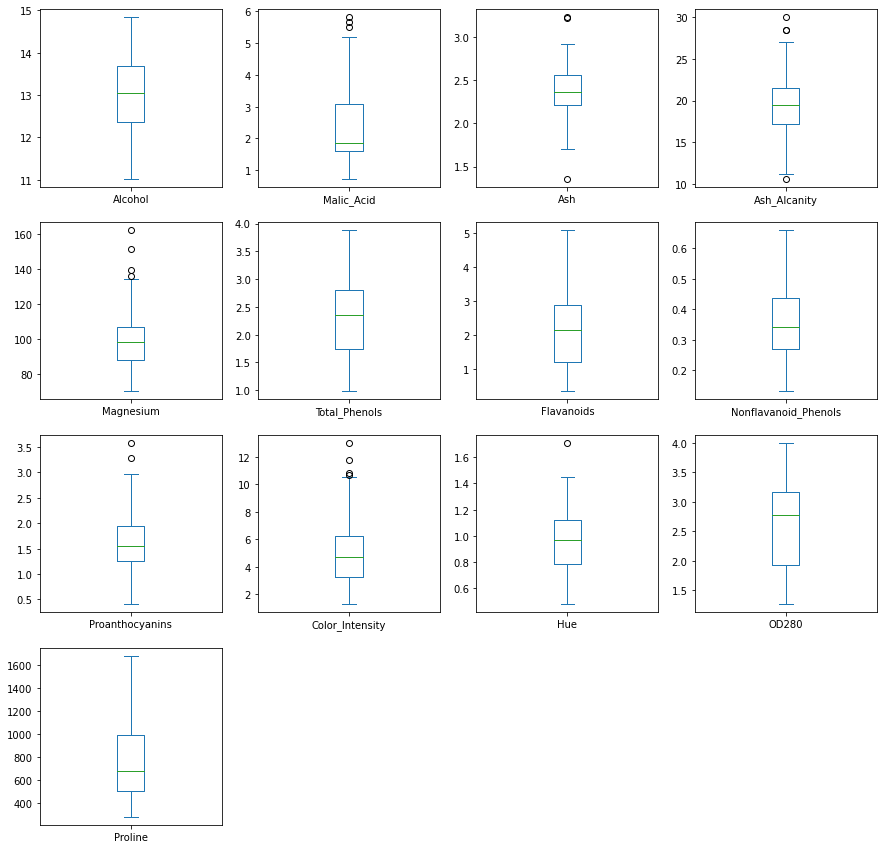

In [8]:
wine_data.plot(kind='box', subplots=True, layout=(4,4), figsize=(15,15))
plt.show()

we can see outliers present in'malic_acid','ash','ash_alcanity','magnesium','hue','proanthocyanins','color_intensity' columns.

In [9]:
#handling outliers

In [10]:
for i in ['Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Proanthocyanins', 'Color_Intensity', 'Hue']:
    q1=np.percentile(wine_data[i],25,interpolation='midpoint')
    q3=np.percentile(wine_data[i],75,interpolation='midpoint')
    IQR=q3-q1
    low_lim=q1-(1.5*IQR)
    up_lim=q3+(1.5*IQR)
    up=wine_data[i]>up_lim
    low=wine_data[i]<low_lim
    wine_data.drop(wine_data.loc[up].index,inplace=True)
    wine_data.drop(wine_data.loc[low].index,inplace=True)

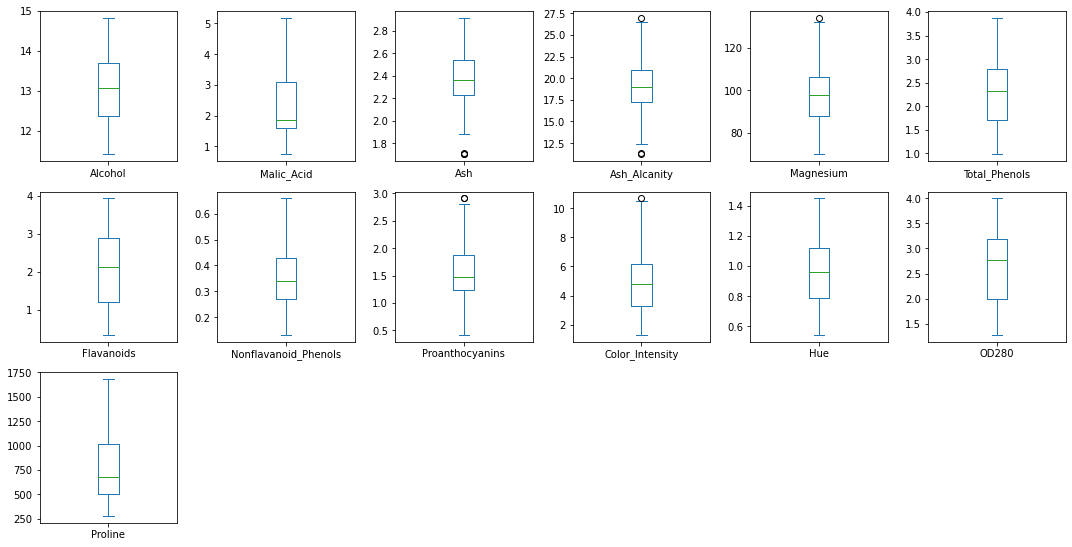

In [11]:
wine_data.plot(kind='box', subplots=True, layout=(6,6), figsize=(15,15))
plt.tight_layout()
plt.show()

In [12]:
wine_data.shape

(161, 13)

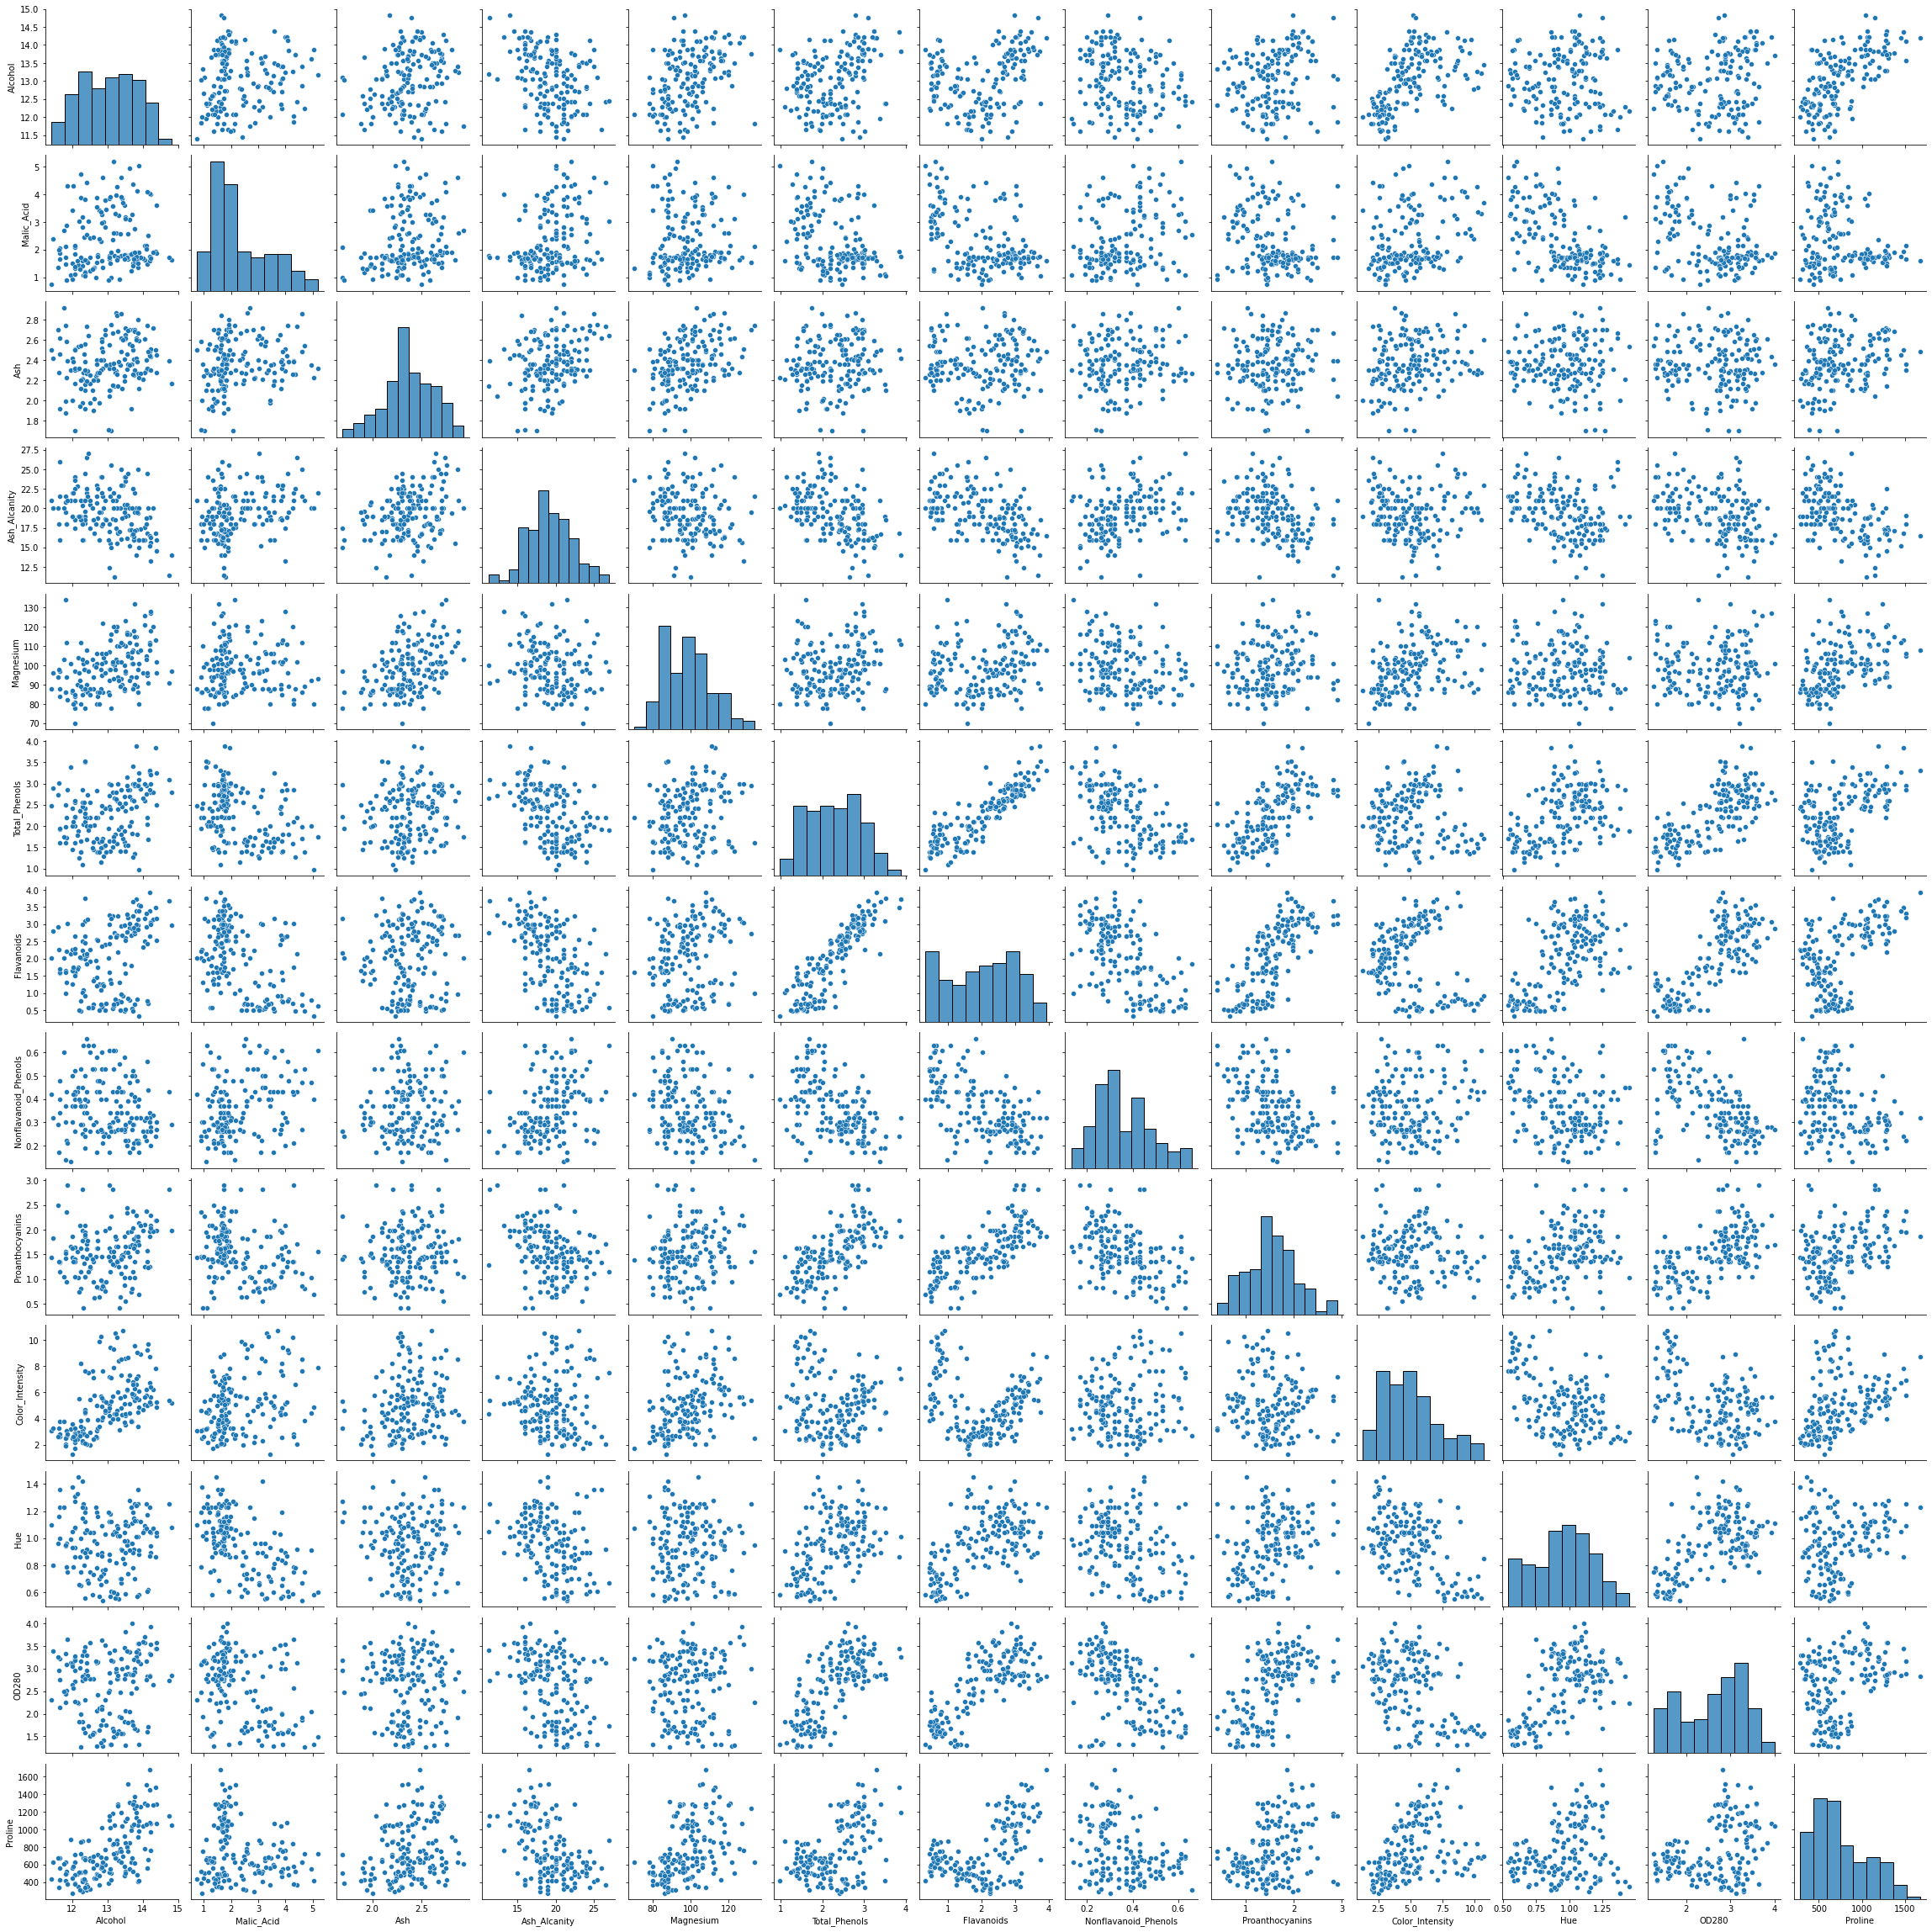

In [13]:
sns.pairplot(wine_data)

In [14]:
# MinMAx Scaling.

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm= MinMaxScaler()
wine_data[wine_data.columns]=mm.fit_transform(wine_data)
wine_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,0.475028,0.354651,0.544802,0.512698,0.446720,0.448426,0.469887,0.432087,0.451503,0.399352,0.458167,0.494460,0.339387
std,0.231410,0.236720,0.198297,0.188237,0.193771,0.216884,0.273376,0.229850,0.205535,0.229277,0.238875,0.261322,0.226688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280702,0.195506,0.434426,0.379747,0.281250,0.248276,0.239554,0.264151,0.332000,0.211702,0.274725,0.267399,0.159772
50%,0.485380,0.251685,0.540984,0.493671,0.437500,0.462069,0.498607,0.396226,0.428000,0.374468,0.461538,0.553114,0.283167
75%,0.666667,0.530337,0.688525,0.620253,0.562500,0.627586,0.713092,0.566038,0.584000,0.523404,0.637363,0.699634,0.529244
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


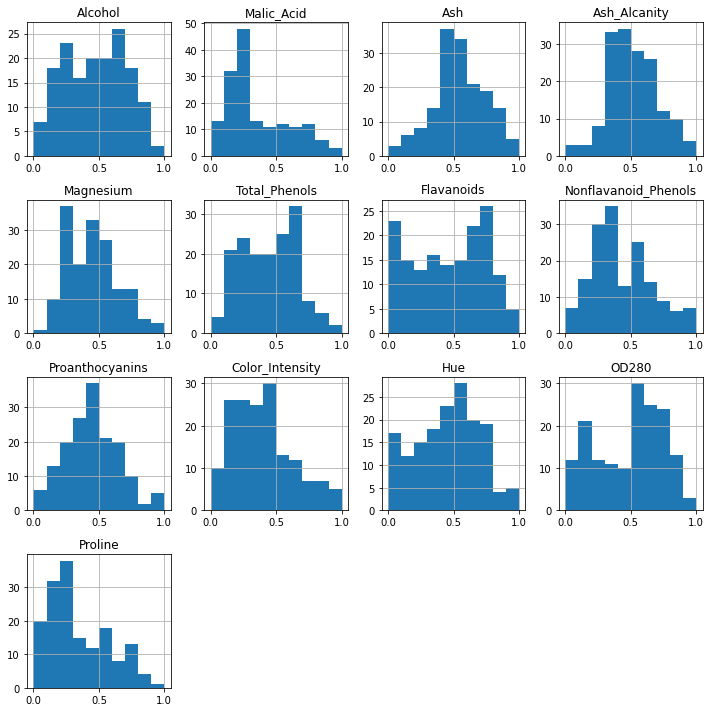

In [16]:
wine_data.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

<AxesSubplot:>

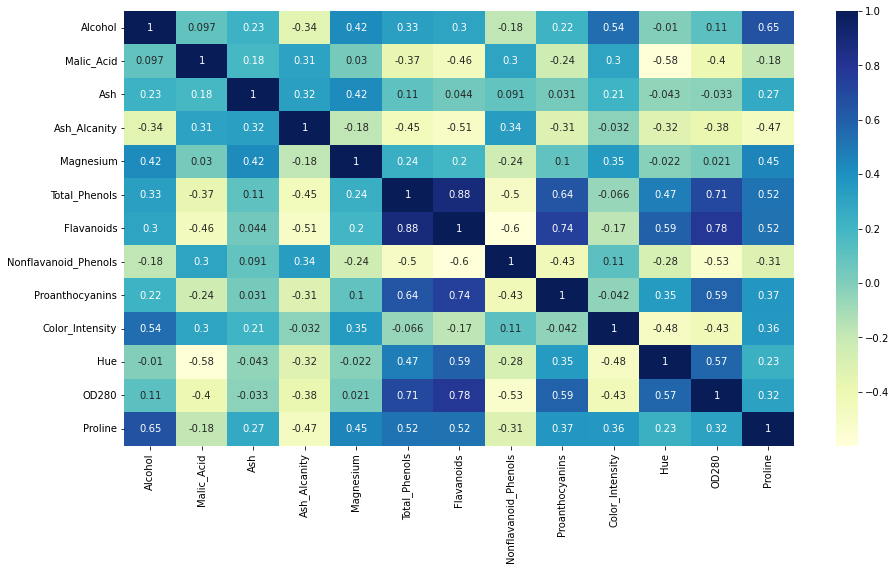

In [17]:
#checking colinearity 
corr = wine_data.corr() 
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

amoung these features total_Phenols n Flavanoids has high postive correlation and Flavanoids n Nonflavanoid_Phenois has high negative correlation

### kmeans clustering

In [18]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(wine_data)
    wcss.append(kmeans.inertia_)
print(kmeans.inertia_)

35.128647975146365


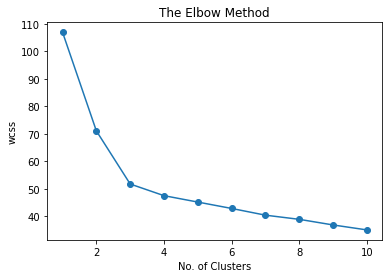

In [19]:
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

From the Elbow Method it is Clear that we have 3 Clusters

In [20]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(wine_data)
y_kmeans


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [21]:
#finding the silhouette score
from sklearn.metrics import silhouette_score
score=silhouette_score(wine_data,y_kmeans,metric='euclidean')
score

0.3151942600426165

In [22]:
wine_data['K_means_Cluster'] = y_kmeans
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means_Cluster
0,0.824561,0.217978,0.598361,0.278481,0.890625,0.627586,0.757660,0.283019,0.752,0.463830,0.549451,0.970696,0.561341,2
1,0.523392,0.233708,0.360656,0.000000,0.468750,0.575862,0.674095,0.245283,0.348,0.329787,0.560440,0.780220,0.550642,2
2,0.511696,0.364045,0.795082,0.468354,0.484375,0.627586,0.807799,0.320755,0.960,0.468085,0.538462,0.695971,0.646933,2
3,0.865497,0.271910,0.655738,0.354430,0.671875,0.989655,0.877437,0.207547,0.708,0.693617,0.351648,0.798535,0.857347,2
4,0.535088,0.415730,0.959016,0.620253,0.750000,0.627586,0.654596,0.490566,0.564,0.323404,0.549451,0.608059,0.325963,2


In [23]:
wine_data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'K_means_Cluster'],
      dtype='object')

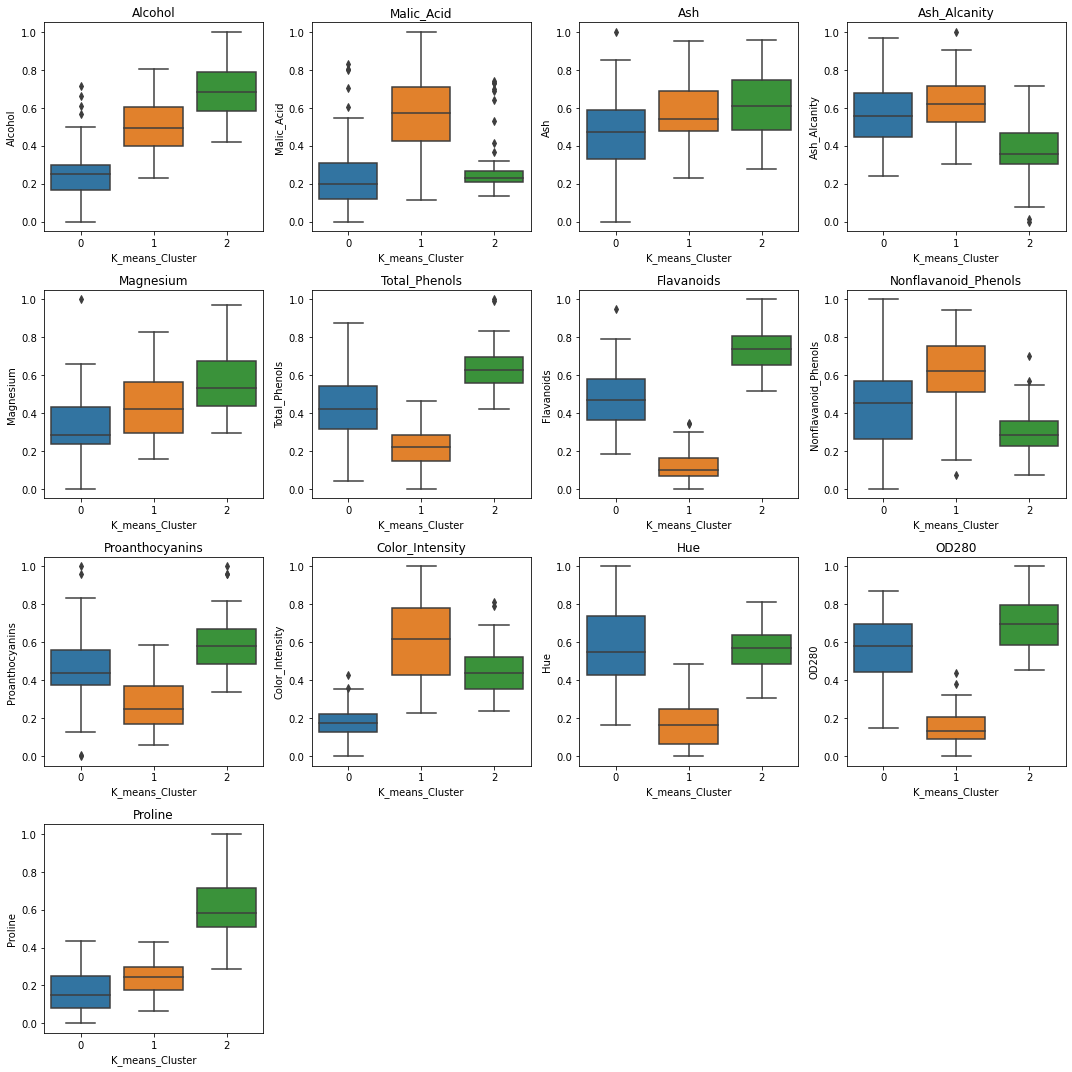

In [24]:
c=['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 
   'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
plt.figure(figsize=(15,15))
for i in range(len(c)):
    plt.subplot(4,4,i+1)
    sns.boxplot(wine_data.K_means_Cluster,wine_data[c[i]])
    plt.title(c[i])
    plt.tight_layout()

In [25]:
wine_data.groupby('K_means_Cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
K_means_Cluster,,,,,,,,,,,,,
0,0.253529,0.248392,0.458451,0.568856,0.329472,0.434839,0.481174,0.432661,0.460345,0.184171,0.572300,0.569281,0.162748
1,0.496631,0.573766,0.573592,0.623418,0.449049,0.228261,0.128013,0.600082,0.271043,0.605550,0.176063,0.155041,0.244511
2,0.682979,0.285945,0.609433,0.366200,0.564145,0.639927,0.734301,0.295929,0.588140,0.451904,0.569693,0.692243,0.595690


### hierarchical clustering

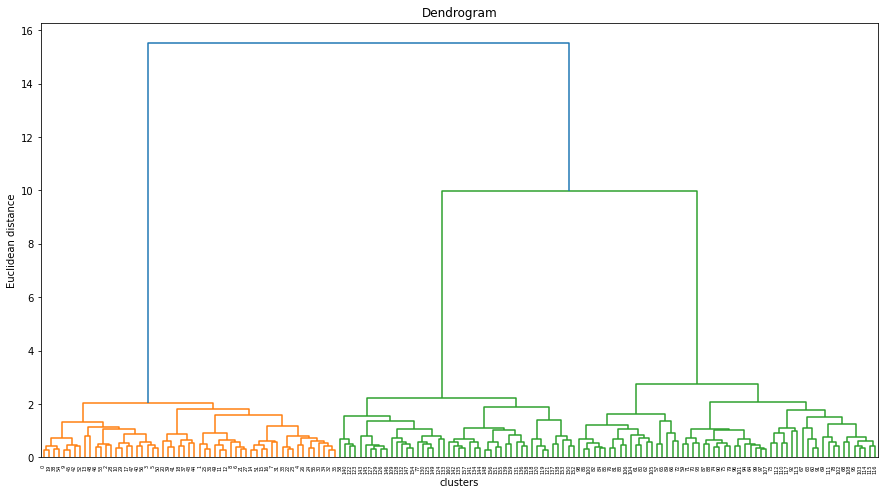

In [26]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15, 8))
dendrogram=sch.dendrogram(sch.linkage(wine_data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('clusters')
plt.ylabel('Euclidean distance')
plt.xticks(rotation=90)
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y = hc.fit_predict(wine_data)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [28]:
#find the silhouette score
score=silhouette_score(wine_data,y,metric='euclidean')
score

0.5266396375583795

In [29]:
wine_data['Hierarchical_Cluster'] = y
wine_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means_Cluster,Hierarchical_Cluster
0,0.824561,0.217978,0.598361,0.278481,0.890625,0.627586,0.757660,0.283019,0.752,0.463830,0.549451,0.970696,0.561341,2,1
1,0.523392,0.233708,0.360656,0.000000,0.468750,0.575862,0.674095,0.245283,0.348,0.329787,0.560440,0.780220,0.550642,2,1
2,0.511696,0.364045,0.795082,0.468354,0.484375,0.627586,0.807799,0.320755,0.960,0.468085,0.538462,0.695971,0.646933,2,1
3,0.865497,0.271910,0.655738,0.354430,0.671875,0.989655,0.877437,0.207547,0.708,0.693617,0.351648,0.798535,0.857347,2,1
4,0.535088,0.415730,0.959016,0.620253,0.750000,0.627586,0.654596,0.490566,0.564,0.323404,0.549451,0.608059,0.325963,2,1


In [30]:
wine_data.groupby('Hierarchical_Cluster').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means_Cluster
Hierarchical_Cluster,,,,,,,,,,,,,,
0,0.253529,0.248392,0.458451,0.568856,0.329472,0.434839,0.481174,0.432661,0.460345,0.184171,0.572300,0.569281,0.162748,0.0
1,0.682979,0.285945,0.609433,0.366200,0.564145,0.639927,0.734301,0.295929,0.588140,0.451904,0.569693,0.692243,0.595690,2.0
2,0.496631,0.573766,0.573592,0.623418,0.449049,0.228261,0.128013,0.600082,0.271043,0.605550,0.176063,0.155041,0.244511,1.0


### PCA

In [31]:
data=wine_data.drop(['K_means_Cluster','Hierarchical_Cluster'],axis=1)

In [32]:
# doing PCA
from sklearn.decomposition import PCA
pca = PCA(.99)
pca.fit(data)
x_pca = pca.transform(data)
x_pca.shape

(161, 12)

In [33]:
data=pd.DataFrame(x_pca)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.778109,-0.357287,0.035255,0.002813,0.053862,0.111331,-0.141537,-0.071134,0.156401,0.317372,-0.083484,-0.066889
1,-0.523341,0.024141,-0.349671,0.080783,0.015316,0.277037,-0.138876,-0.173050,-0.096895,-0.070859,0.008224,-0.122001
2,-0.600106,-0.234016,0.266428,0.052911,-0.112227,-0.219015,-0.032695,0.101362,-0.230803,0.115137,0.044709,-0.044290
3,-0.855620,-0.672589,0.019247,0.107344,-0.025174,-0.122040,-0.017179,-0.207407,-0.007026,-0.063337,-0.026090,0.108074
4,-0.247602,-0.162994,0.470457,-0.200636,0.037053,0.004392,-0.143786,0.022412,0.126674,0.013677,0.055632,-0.023526


In [34]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
print(kmeans.inertia_)

34.46286035823698


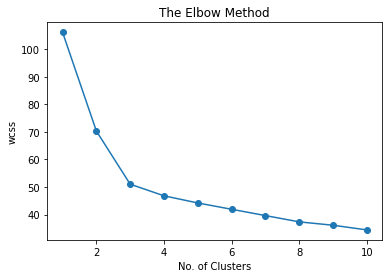

In [35]:
plt.plot(range(1,11),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

optimum no. of clusters=3

In [36]:
k_model=KMeans(n_clusters=3,init='k-means++',random_state=42)
y=k_model.fit_predict(data)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [37]:
wine_data['clusters']=y
wine_data.groupby('clusters').mean()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,K_means_Cluster,Hierarchical_Cluster
clusters,,,,,,,,,,,,,,,
0,0.253529,0.248392,0.458451,0.568856,0.329472,0.434839,0.481174,0.432661,0.460345,0.184171,0.572300,0.569281,0.162748,0.0,0.0
1,0.496631,0.573766,0.573592,0.623418,0.449049,0.228261,0.128013,0.600082,0.271043,0.605550,0.176063,0.155041,0.244511,1.0,2.0
2,0.682979,0.285945,0.609433,0.366200,0.564145,0.639927,0.734301,0.295929,0.588140,0.451904,0.569693,0.692243,0.595690,2.0,1.0


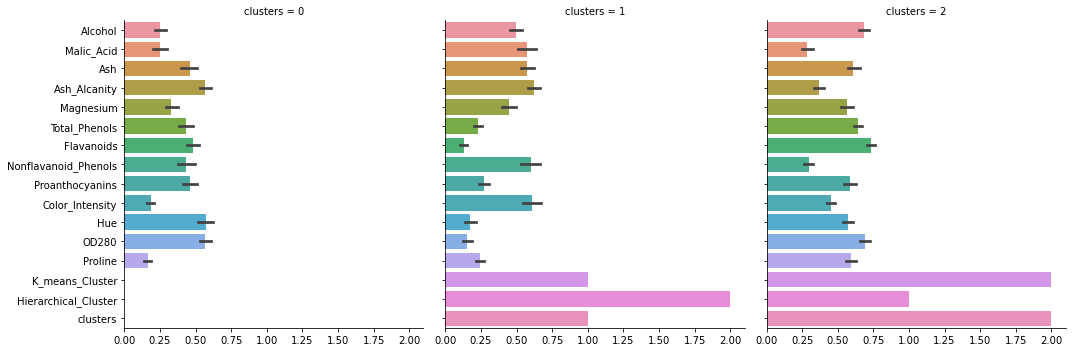

In [38]:
sns.catplot(data=wine_data,orient='h',col='clusters',kind="bar")

In [39]:
wine_data['clusters'].value_counts()

0    58
2    57
1    46
Name: clusters, dtype: int64

PCA doesnt have any effect in clustering,similar result was obtained withkmeans without doing PCA.
